In [1]:
path  = '../data/'

In [2]:
from dask import dataframe as dd
import pandas as pd
import matplotlib
%matplotlib inline

In [8]:
df_sds011 = dd.read_csv(path + 'processed*sds011*').compute()
df_dht22 = dd.read_csv(path + 'processed*dht22*').compute()

## Data Cleaning (syntactic)

In [9]:
df_sds011.shape, df_dht22.shape

((739843, 14), (743179, 10))

In [10]:
print(df_sds011.columns)
print(df_sds011.dtypes)
print(df_dht22.columns)
print(df_dht22.dtypes)

Index(['sensor_id', 'sensor_type', 'location', 'lat', 'lon', 'timestamp', 'P1',
       'durP1', 'ratioP1', 'P2', 'durP2', 'ratioP2', 'filepath', 'filename'],
      dtype='object')
sensor_id        int64
sensor_type     object
location         int64
lat            float64
lon            float64
timestamp       object
P1             float64
durP1          float64
ratioP1        float64
P2             float64
durP2          float64
ratioP2        float64
filepath        object
filename        object
dtype: object
Index(['sensor_id', 'sensor_type', 'location', 'lat', 'lon', 'timestamp',
       'temperature', 'humidity', 'filepath', 'filename'],
      dtype='object')
sensor_id        int64
sensor_type     object
location         int64
lat            float64
lon            float64
timestamp       object
temperature    float64
humidity       float64
filepath        object
filename        object
dtype: object


### Convert to date time

In [11]:
df_sds011['timestamp'] = pd.to_datetime(df_sds011['timestamp'], format='%Y-%m-%dT%H:%M:%S')
df_dht22['timestamp'] = pd.to_datetime(df_dht22['timestamp'], format='%Y-%m-%dT%H:%M:%S')

In [12]:
df_sds011.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,739843.000000,739843.000000,739843.000000,739843.000000,739843.000000,0.0,0.0,739843.000000,0.0,0.0
mean,8906.500676,4503.790254,52.508129,13.281753,26.867225,NaN,NaN,15.717884,NaN,NaN
std,3572.423052,1809.321821,0.001974,0.020279,31.916156,NaN,NaN,17.506098,NaN,NaN
min,6179.000000,3123.000000,52.506000,13.236000,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,6179.000000,3123.000000,52.506000,13.256000,6.920000,NaN,NaN,3.800000,NaN,NaN
50%,7201.000000,3642.000000,52.508000,13.285000,14.130000,NaN,NaN,8.330000,NaN,NaN
75%,12603.000000,6367.000000,52.509000,13.303000,35.530000,NaN,NaN,21.200000,NaN,NaN
max,20826.000000,10574.000000,52.513000,13.303000,1999.900000,NaN,NaN,564.800000,NaN,NaN


In [13]:
df_dht22.describe()

,sensor_id,location,lat,lon,temperature,humidity
count,743179.000000,743179.000000,743179.000000,743179.000000,743179.000000,743179.000000
mean,8898.584318,4499.273158,52.508132,13.281658,12.650757,80.143466
std,3569.585902,1807.879381,0.001971,0.020298,9.213619,23.280162
min,6180.000000,3123.000000,52.506000,13.236000,-10.400000,5.200000
25%,6180.000000,3123.000000,52.506000,13.256000,5.500000,62.600000
50%,7202.000000,3642.000000,52.508000,13.285000,10.800000,91.300000
75%,12604.000000,6367.000000,52.509000,13.303000,19.200000,99.900000
max,20827.000000,10574.000000,52.513000,13.303000,57.800000,99.900000


In [14]:
df_sds011.groupby(['sensor_id', 'location']).count()

,,sensor_type,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2,filepath,filename
sensor_id,location,,,,,,,,,,,,
6179,3123,264096,264096,264096,264096,264096,0,0,264096,0,0,264096,264096
7201,3642,248374,248374,248374,248374,248374,0,0,248374,0,0,248374,248374
12603,6367,161817,161817,161817,161817,161817,0,0,161817,0,0,161817,161817
17231,8732,65543,65543,65543,65543,65543,0,0,65543,0,0,65543,65543
20826,10574,13,13,13,13,13,0,0,13,0,0,13,13


In [15]:
df_dht22.groupby(['sensor_id', 'location']).count()

,,sensor_type,lat,lon,timestamp,temperature,humidity,filepath,filename
sensor_id,location,,,,,,,,
6180,3123,266982,266982,266982,266982,266982,266982,266982,266982
7202,3642,248466,248466,248466,248466,248466,248466,248466,248466
12604,6367,162158,162158,162158,162158,162158,162158,162158,162158
17232,8732,65560,65560,65560,65560,65560,65560,65560,65560
20827,10574,13,13,13,13,13,13,13,13


### Dropping

In [16]:
df_sds011 = df_sds011[['sensor_id', 'sensor_type', 'location', 'lat', 'lon', 'timestamp', 'P1', 'P2']]

In [17]:
df_sds011.isnull().sum()

sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
timestamp      0
P1             0
P2             0
dtype: int64

In [18]:
df_dht22.isnull().sum()

sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
timestamp      0
temperature    0
humidity       0
filepath       0
filename       0
dtype: int64

## Data Cleaning (semantic)

First set resample into a 1 min resolution filter merge dht with sds and the set resolution to 30 or 60min.
But first some humidity plots for all locations


In [79]:
df_dht22

,sensor_id,sensor_type,location,lat,lon,timestamp,temperature,humidity,filepath,filename
0,6180,DHT22,3123,52.509,13.256,2017-10-08 14:34:53,14.2,50.1,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
1,6180,DHT22,3123,52.509,13.256,2017-10-08 14:37:20,14.1,48.9,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
2,6180,DHT22,3123,52.509,13.256,2017-10-08 14:39:47,14.5,47.7,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
3,6180,DHT22,3123,52.509,13.256,2017-10-08 14:42:14,15.2,45.8,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
4,6180,DHT22,3123,52.509,13.256,2017-10-08 14:44:41,15.2,44.9,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
5,6180,DHT22,3123,52.509,13.256,2017-10-08 14:47:08,14.8,48.5,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
6,6180,DHT22,3123,52.509,13.256,2017-10-08 14:49:35,14.5,48.0,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
7,6180,DHT22,3123,52.509,13.256,2017-10-08 14:52:02,14.2,50.1,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
8,6180,DHT22,3123,52.509,13.256,2017-10-08 14:54:28,13.8,51.6,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv
9,6180,DHT22,3123,52.509,13.256,2017-10-08 14:56:55,13.8,52.7,2017-10-08_dht22_sensor_6180.csv,2017-10-08_dht22_sensor_6180.csv


## First look at data 

### Resample to an 60Min resolution

In [73]:
df_sds011.location.value_counts().keys()

Int64Index([3123, 3642, 6367, 8732, 10574], dtype='int64')

In [69]:
dfs = [] 

for key in df_sds011.location.value_counts().keys():
    sub_df = df_sds011[df_sds011.location == key]
    sub_df = sub_df.set_index(sub_df.timestamp)
    sub_df = sub_df.resample('60min').mean()
    dfs.append(sub_df)
    
p_sds011 = pd.concat(dfs)

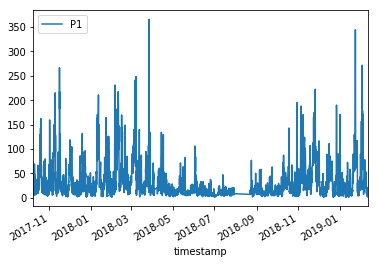

In [74]:
p_sds011[p_sds011.location == 3123][['P1']].plot.line()

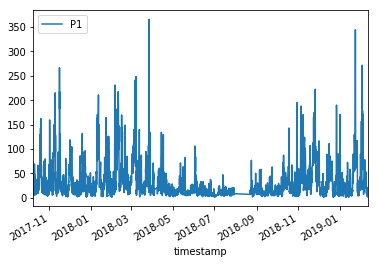

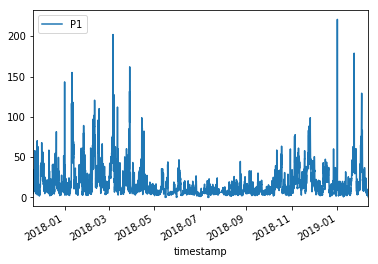

In [78]:
p_sds011[p_sds011.location == 3123][['P1']].interpolate(method='spline', order=5).plot.line()
p_sds011[p_sds011.location == 3642][['P1']].interpolate(method='spline', order=5).plot.line()

In [231]:
df_sds011 = df_sds011.resample('60min').mean()
df_dht22 = df_dht22.resample('60min').mean()

In [233]:
print(df_sds011.isnull().sum())
df_sds011.describe()

sensor_id    75
location     75
lat          75
lon          75
P1           75
P2           75
dtype: int64


,sensor_id,location,lat,lon,P1,P2
count,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000
mean,6930.942139,3503.857022,52.507769,13.276009,29.778790,15.064331
std,796.903317,402.512514,0.000634,0.010180,30.050570,13.422234
min,6179.000000,3123.000000,52.506000,13.256000,1.772609,0.926667
25%,6679.571429,3377.204082,52.507500,13.279020,10.283951,5.011847
50%,6690.000000,3382.500000,52.507531,13.279500,18.985600,10.211644
75%,6700.428571,3387.795918,52.507671,13.279980,37.725204,20.976663
max,9125.327869,4612.032787,52.509000,13.303000,266.631250,88.217600


In [234]:
print(df_dht22.isnull().sum())
df_dht22.describe()

sensor_id      75
location       75
lat            75
lon            75
temperature    75
humidity       75
dtype: int64


,sensor_id,location,lat,lon,temperature,humidity
count,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000
mean,6927.445915,3501.547934,52.507808,13.275426,9.458702,81.203837
std,804.264557,406.210592,0.000569,0.009245,7.723304,14.744557
min,6180.000000,3123.000000,52.506000,13.256000,-8.963265,23.258000
25%,6680.571429,3377.204082,52.507500,13.279020,4.197000,75.191939
50%,6691.000000,3382.500000,52.507531,13.279500,7.720833,85.508163
75%,6701.428571,3387.795918,52.507671,13.279980,13.664653,90.686901
max,9078.806452,4588.016129,52.509000,13.303000,37.045333,99.900000


In [236]:
df_sds011.head()

,sensor_id,location,lat,lon,P1,P2
timestamp,,,,,,
2017-10-08 14:00:00,6179.0,3123.0,52.509,13.256,8.205455,3.903636
2017-10-08 15:00:00,6179.0,3123.0,52.509,13.256,4.899167,1.429583
2017-10-08 16:00:00,6179.0,3123.0,52.509,13.256,5.118000,1.593600
2017-10-08 17:00:00,6179.0,3123.0,52.509,13.256,5.790833,2.189167
2017-10-08 18:00:00,6179.0,3123.0,52.509,13.256,8.172000,2.500400


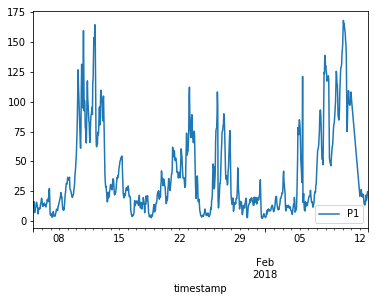

In [211]:
test[['P1']].truncate(before='2018-01-05').interpolate(method='spline', order=1).plot.line()

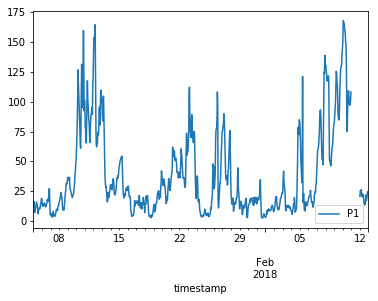

In [212]:
test[['P1']].truncate(before='2018-01-05').plot.line()

In [134]:
test.describe


2017-10-08 14:34:52 2018-02-12 23:58:09
2017-10-08 14:34:52 2018-02-12 23:58:09


In [135]:
test[test > '2017-10-08']

TypeError: Invalid comparison between dtype=int64 and str